### Data Description -

- Battery_power - Total energy a battery can store in one time measured in mAh
- Blue - Has bluetooth or not
- Clock_speed - speed at which microprocessor executes instructions
- Dual_sim - Has dual sim support or not
- Fc - Front Camera mega pixels
- Four_g - Has 4G or not
- Int_memory - Internal Memory in Gigabytes
- M_dep - Mobile Depth in cm
- Mobile_wt - Weight of mobile phone
- N_cores - Number of cores of processor
- Pc - Primary Camera mega pixels
- Px_height - Pixel Resolution Height
- Px_width - Pixel Resolution Width
- Ram - Random Access Memory in Mega
- Touch_screen - Has touch screen or not
- Wifi - Has wifi or not
- Sc_h - Screen Height of mobile in cm
- Sc_w - Screen Width of mobile in cm
- Talk_time - longest time that a single battery charge will last when you are
- Three_g - Has 3G or not
- Wifi - Has wifi or not
- Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
tt=pd.read_csv('test.csv')

# Data Preprocessing

In [3]:
df.shape

(2000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## Exploratory Data Analysis

In [10]:
#Price

In [11]:
cat=[ 'blue', 'dual_sim', 'four_g','n_cores','three_g','touch_screen', 'wifi', 'price_range']

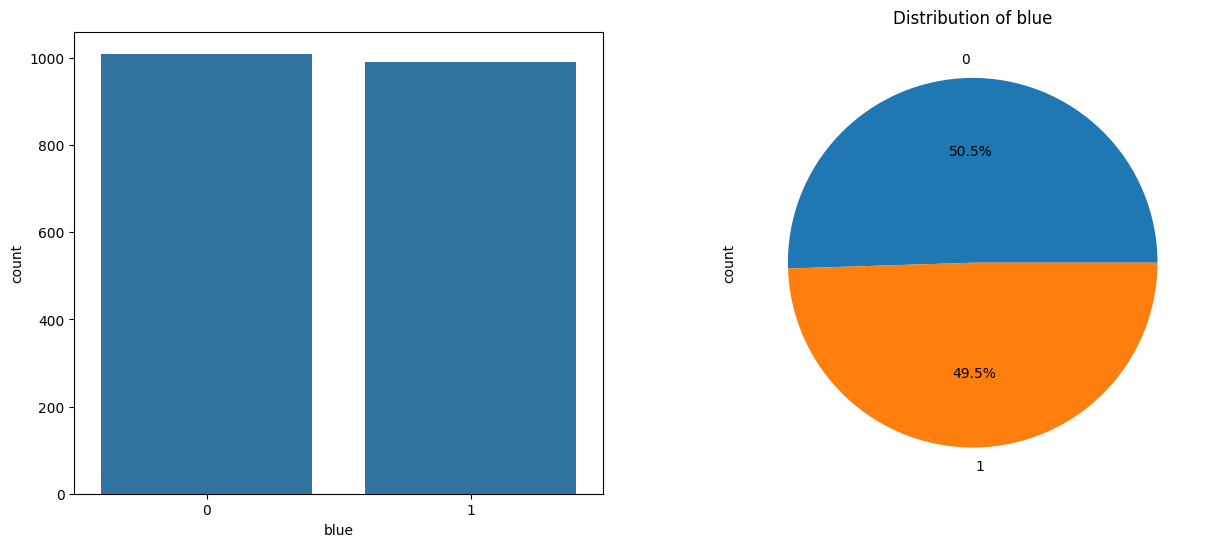

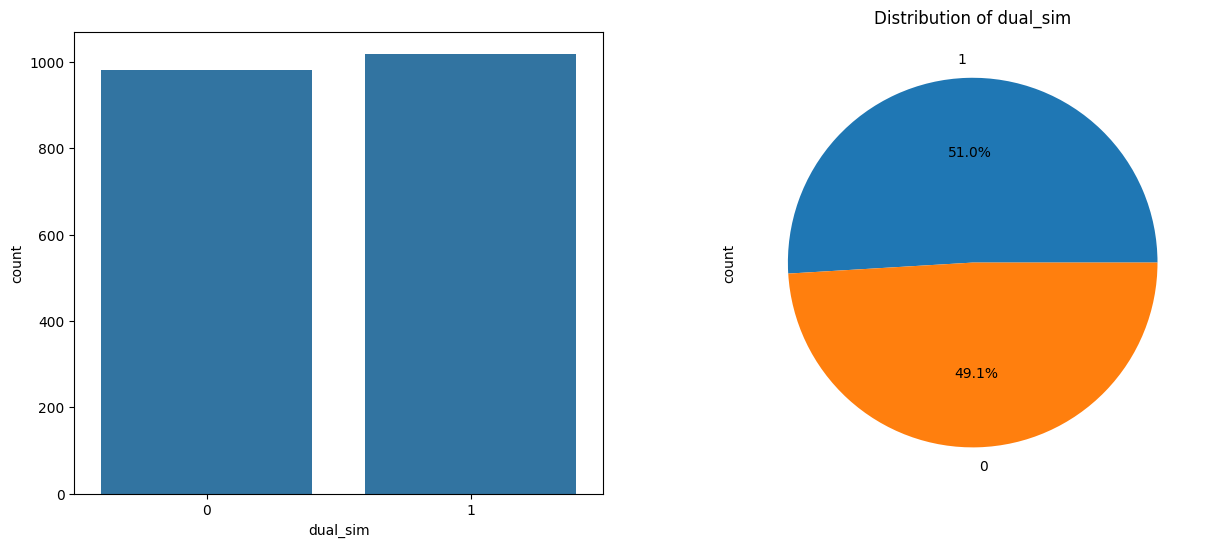

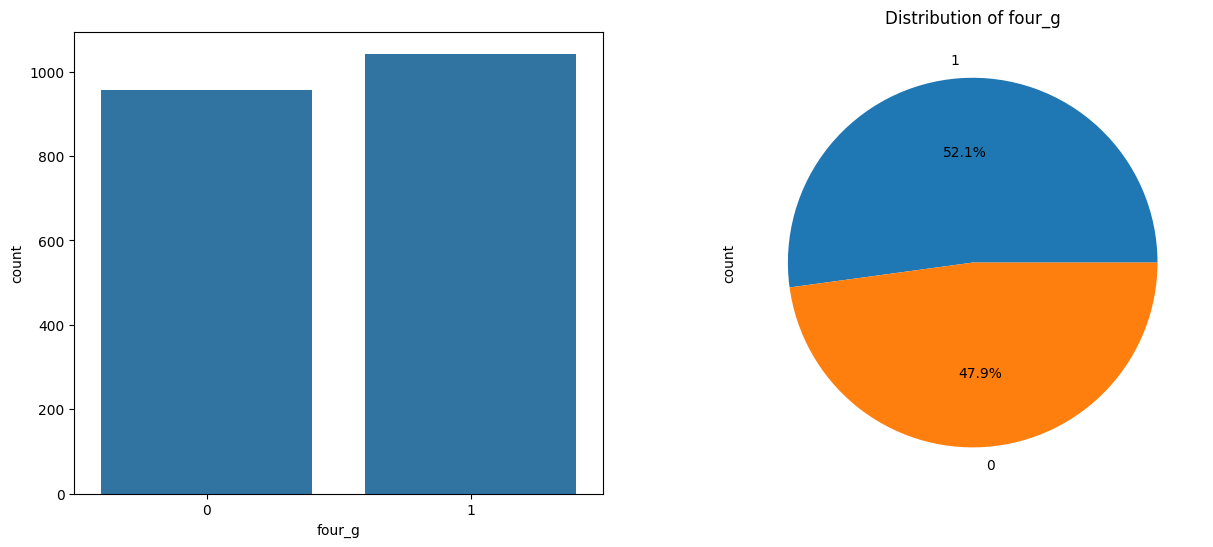

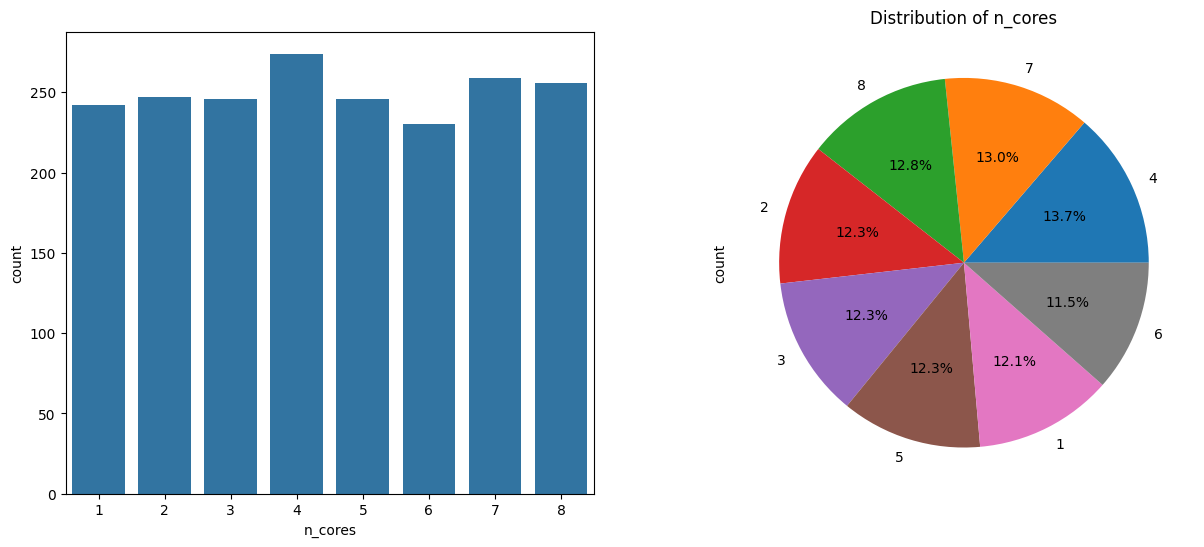

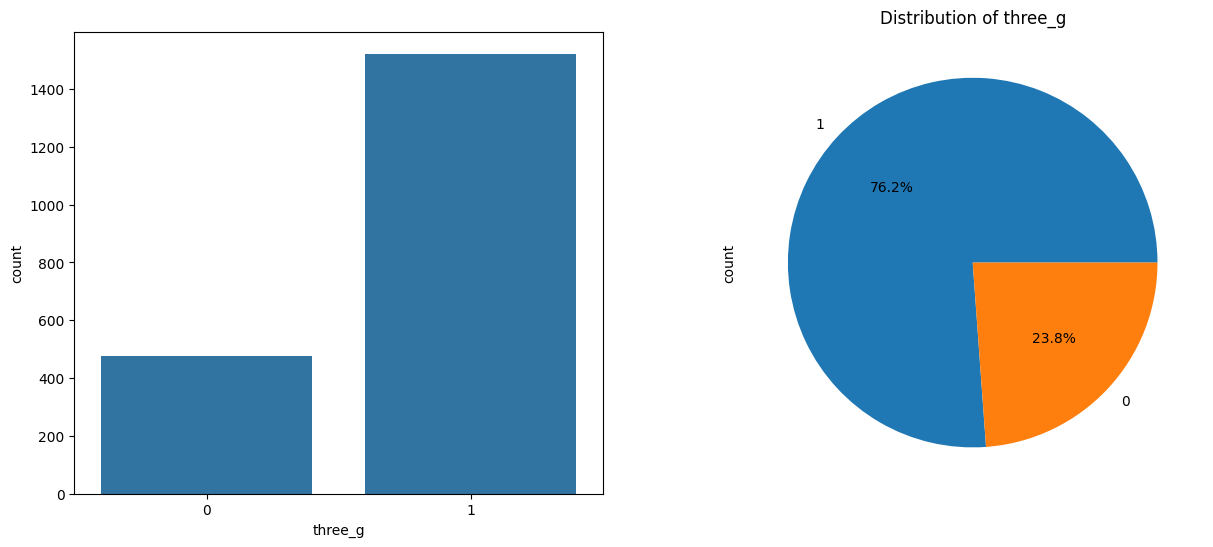

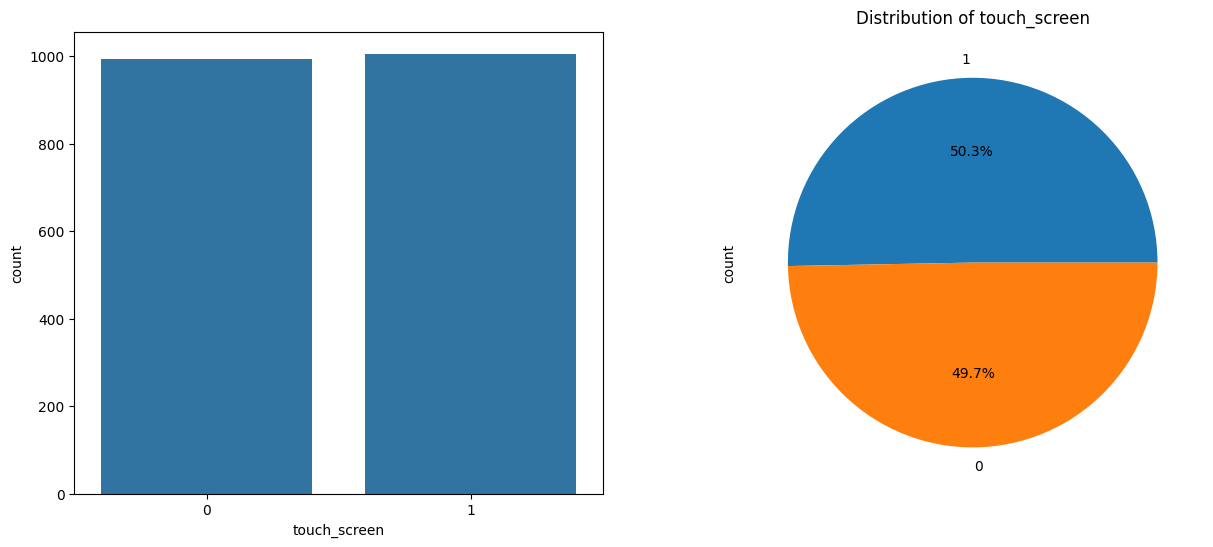

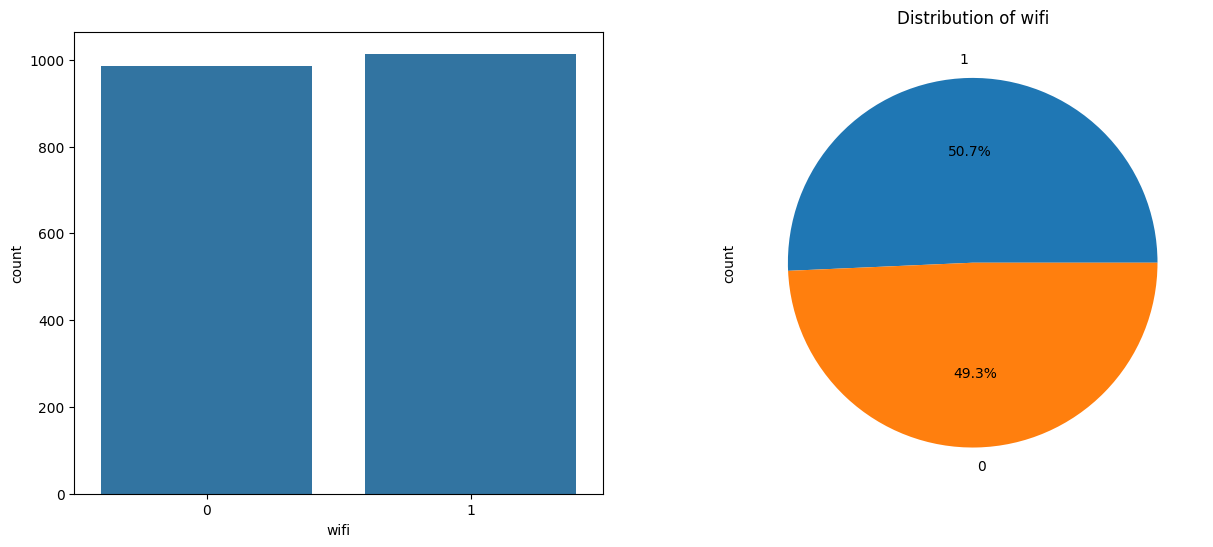

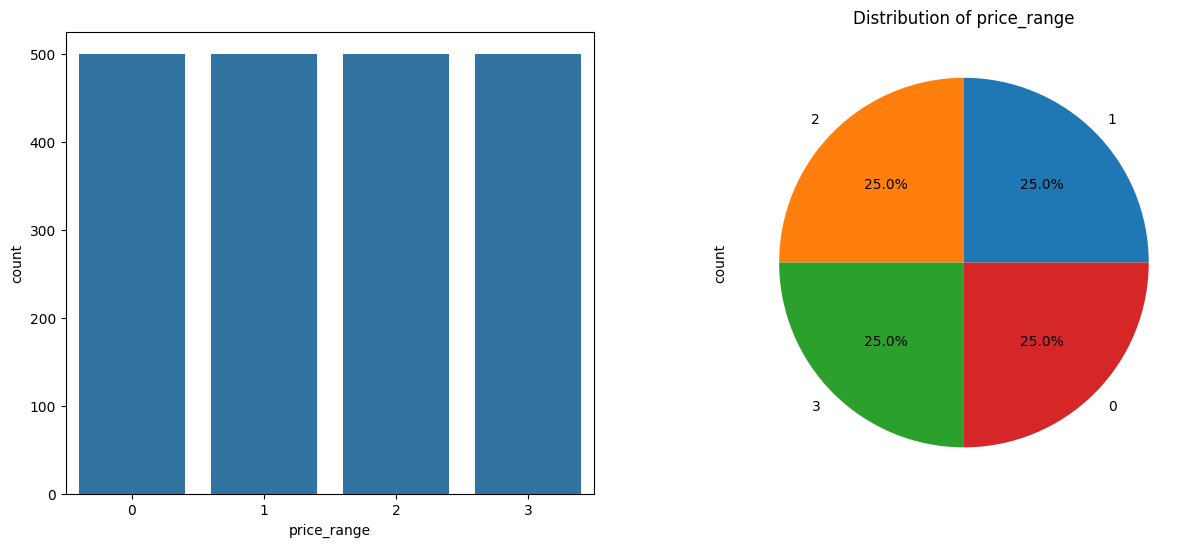

In [12]:
for i in cat:

    fig,ax = plt.subplots(ncols = 2, figsize = (15, 6))
    sns.countplot(df,x=i,ax=ax[0],)
    ax[1].set_title('Distribution of '+ i)
    df[i].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%')


In [13]:
#battery

<Axes: xlabel='battery_power', ylabel='Count'>

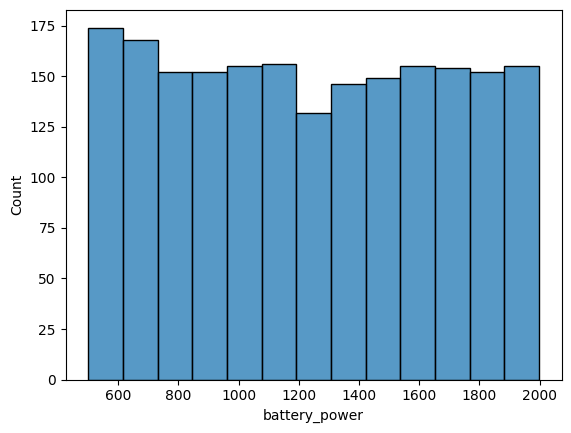

In [14]:
sns.histplot(df,x='battery_power',)

<Axes: xlabel='price_range', ylabel='ram'>

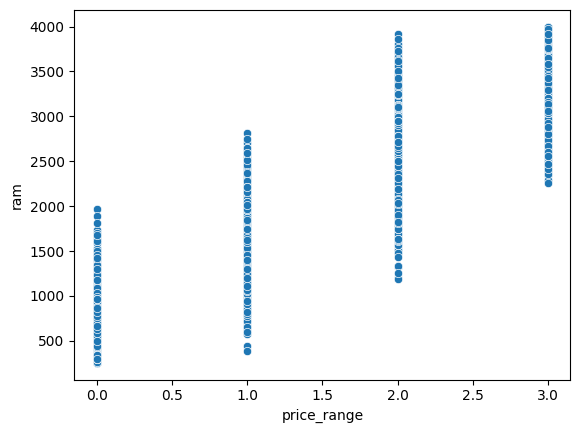

In [15]:
sns.scatterplot(df,y='ram',x='price_range')

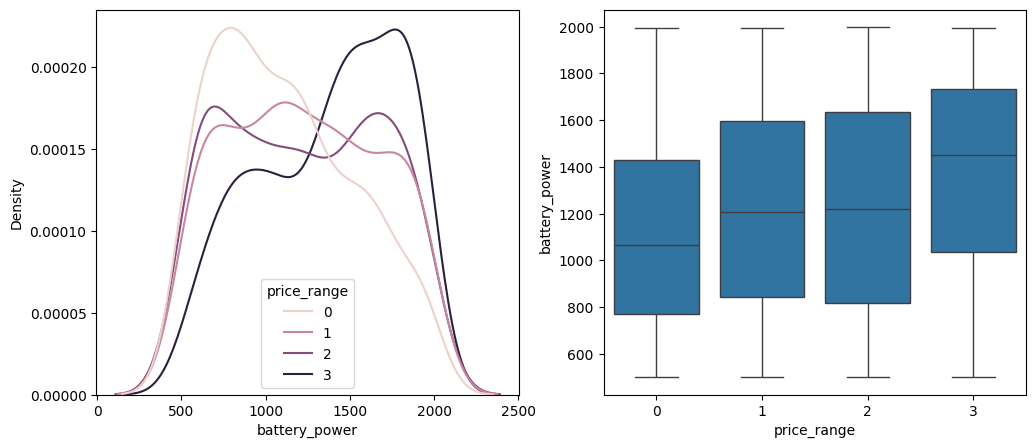

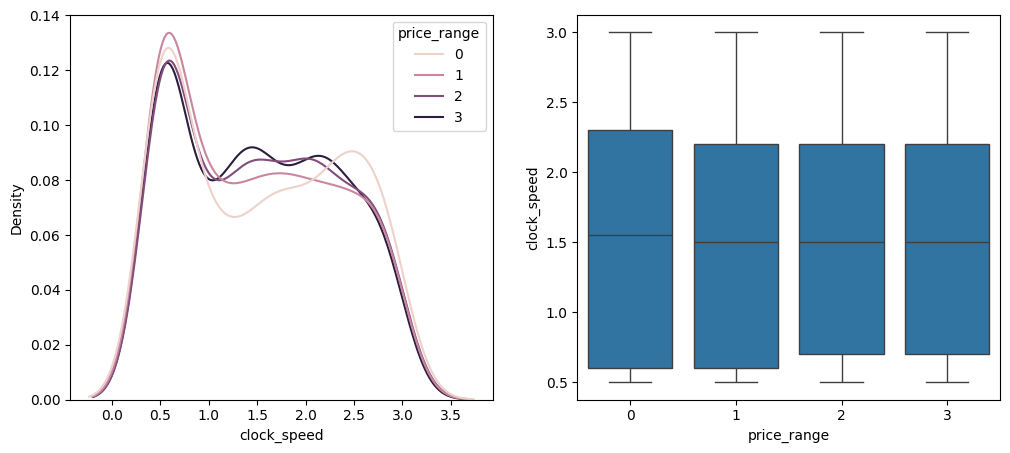

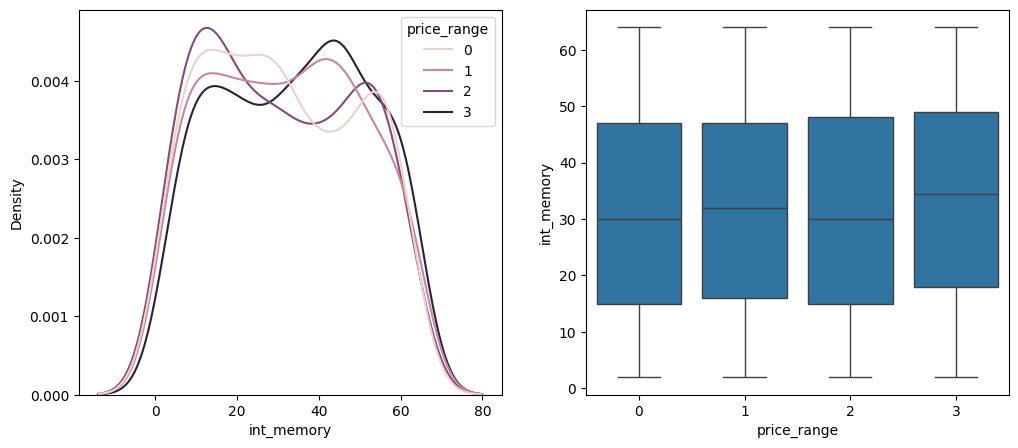

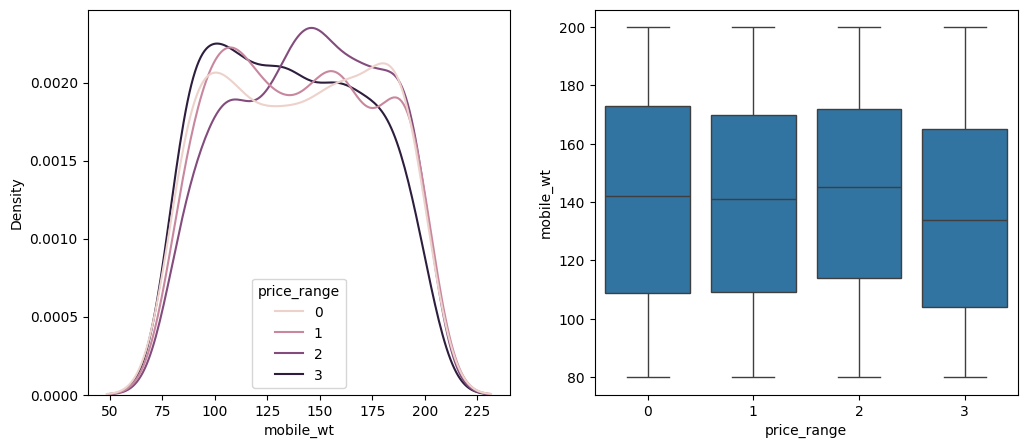

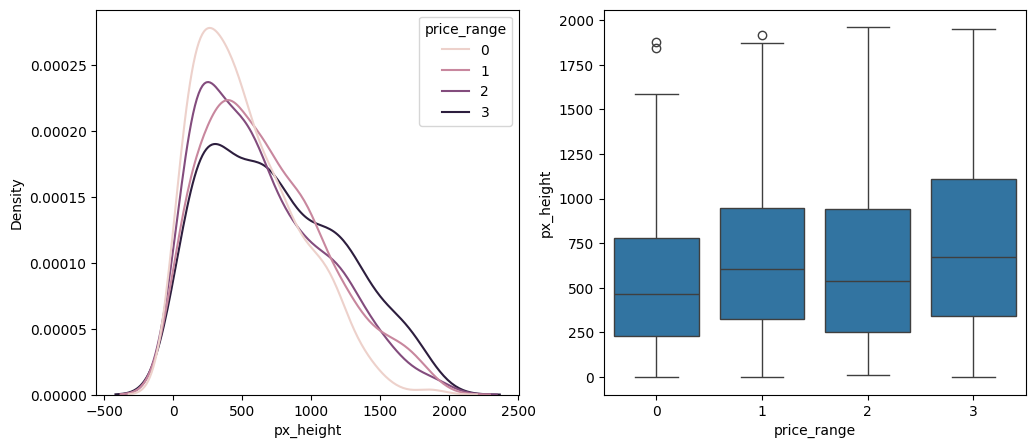

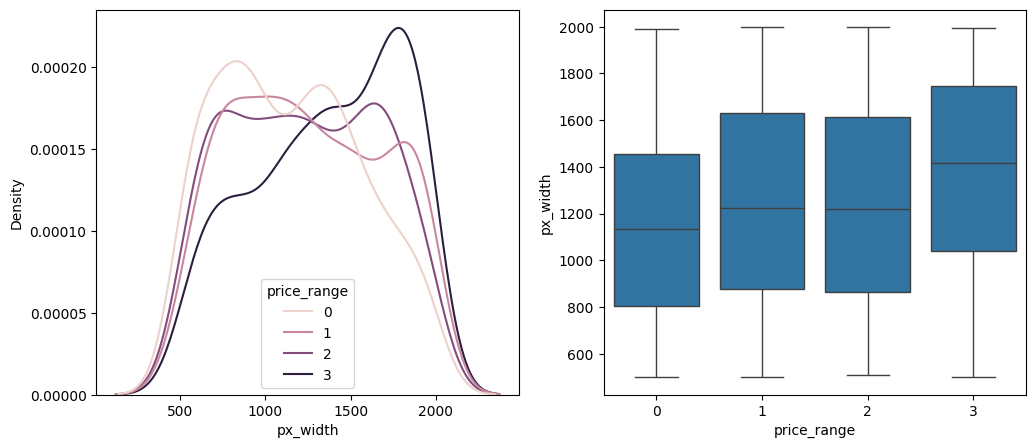

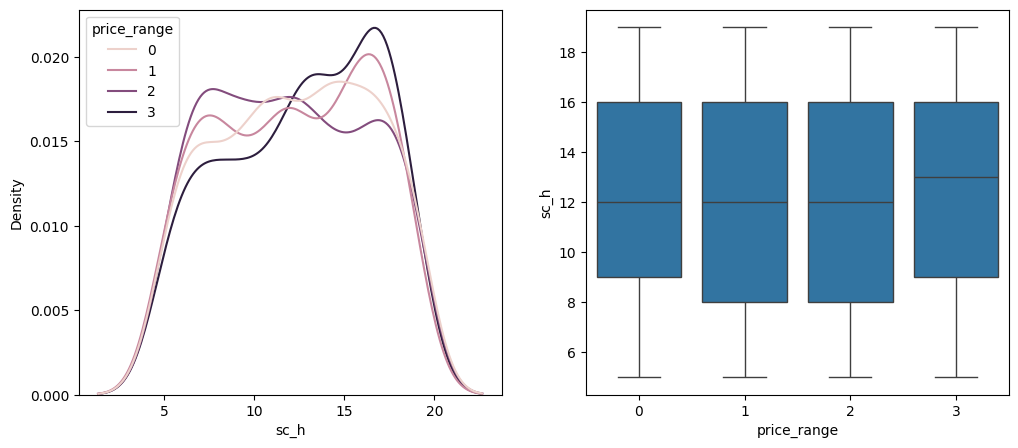

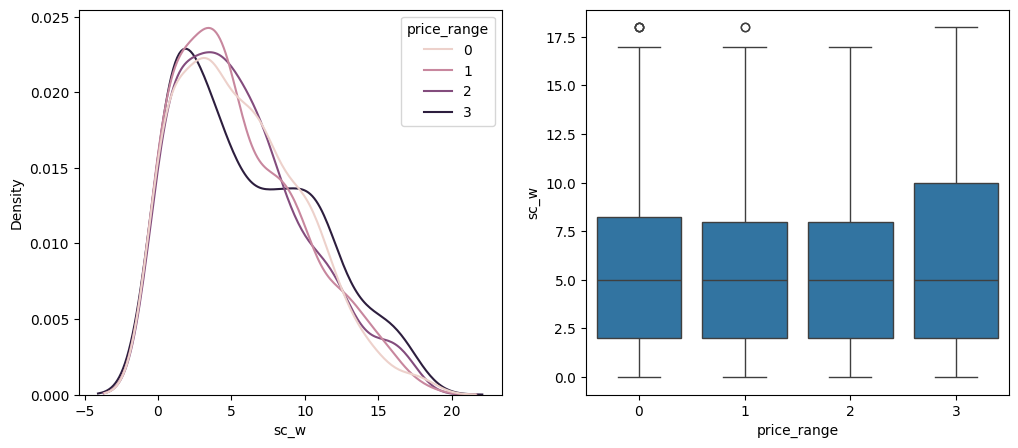

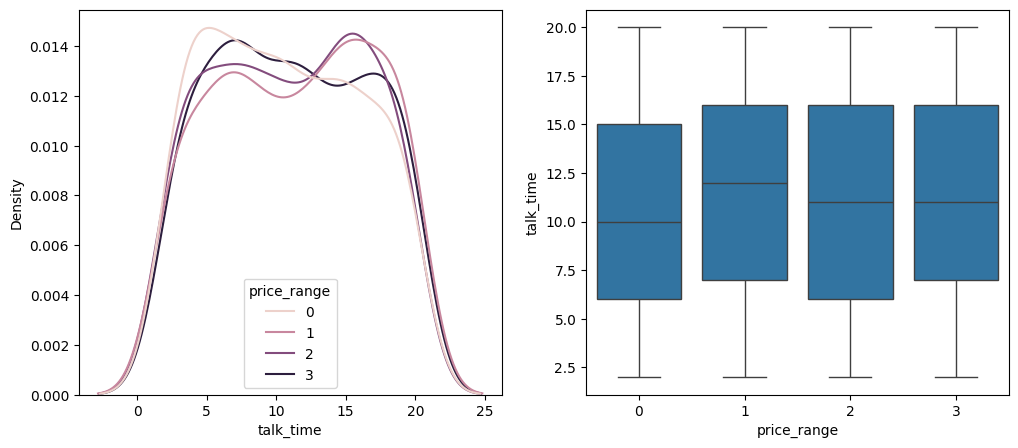

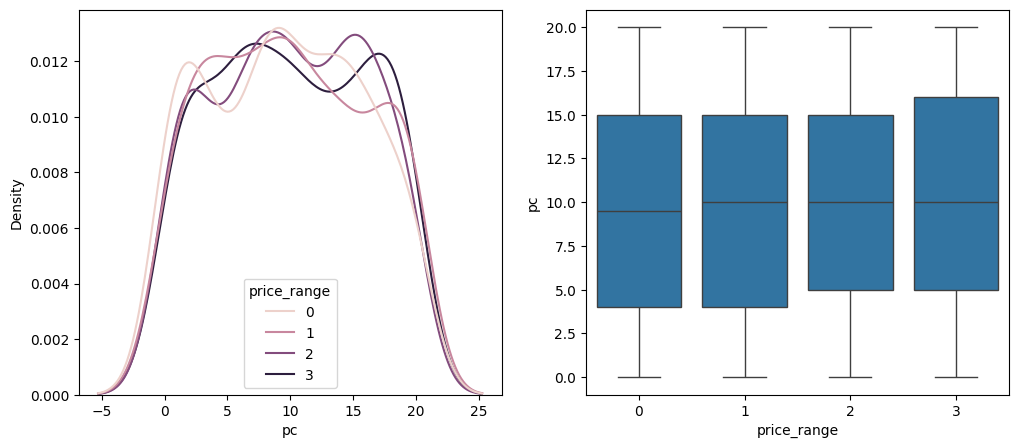

In [16]:
list=['battery_power','clock_speed','int_memory','mobile_wt','px_height','px_width', 'sc_h', 'sc_w', 'talk_time','pc']
for i in list:
    fig,ax=plt.subplots(ncols=2,figsize=(12,5))
    sns.kdeplot(df,x=i,hue='price_range',ax=ax[0])
    sns.boxplot(df,x='price_range',y=i)

In [17]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<Axes: >

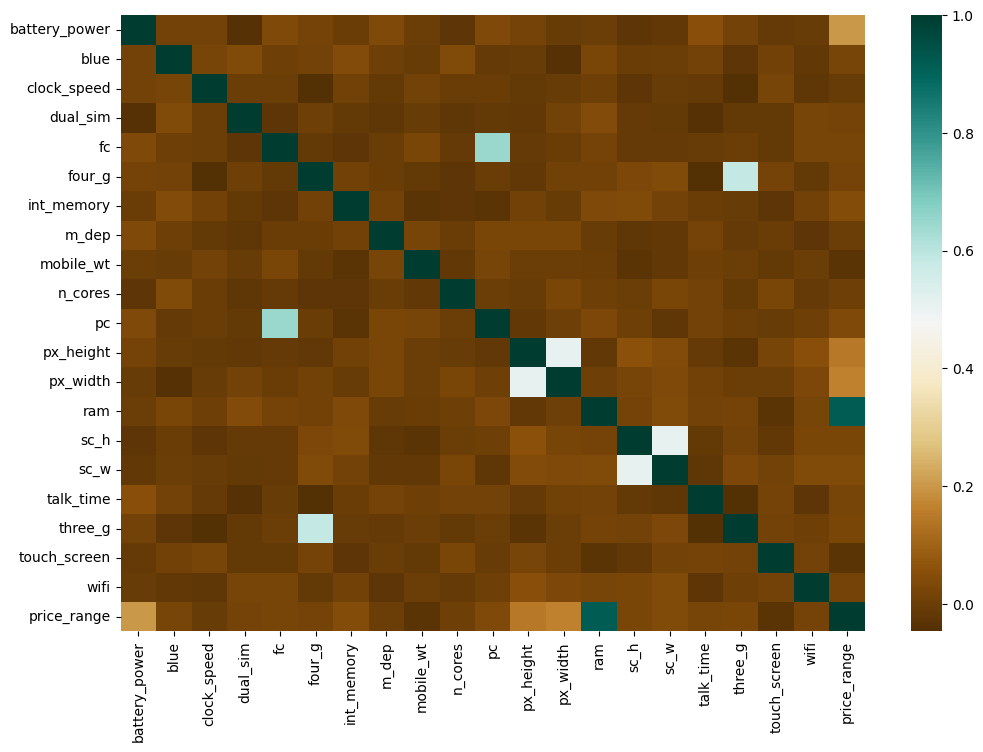

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='BrBG')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'ram'),
  Text(1, 0, 'battery_power'),
  Text(2, 0, 'px_width'),
  Text(3, 0, 'px_height'),
  Text(4, 0, 'int_memory'),
  Text(5, 0, 'sc_w'),
  Text(6, 0, 'pc'),
  Text(7, 0, 'three_g'),
  Text(8, 0, 'sc_h'),
  Text(9, 0, 'fc'),
  Text(10, 0, 'talk_time'),
  Text(11, 0, 'blue'),
  Text(12, 0, 'wifi'),
  Text(13, 0, 'dual_sim'),
  Text(14, 0, 'four_g'),
  Text(15, 0, 'n_cores'),
  Text(16, 0, 'm_dep'),
  Text(17, 0, 'clock_speed'),
  Text(18, 0, 'mobile_wt'),
  Text(19, 0, 'touch_screen')])

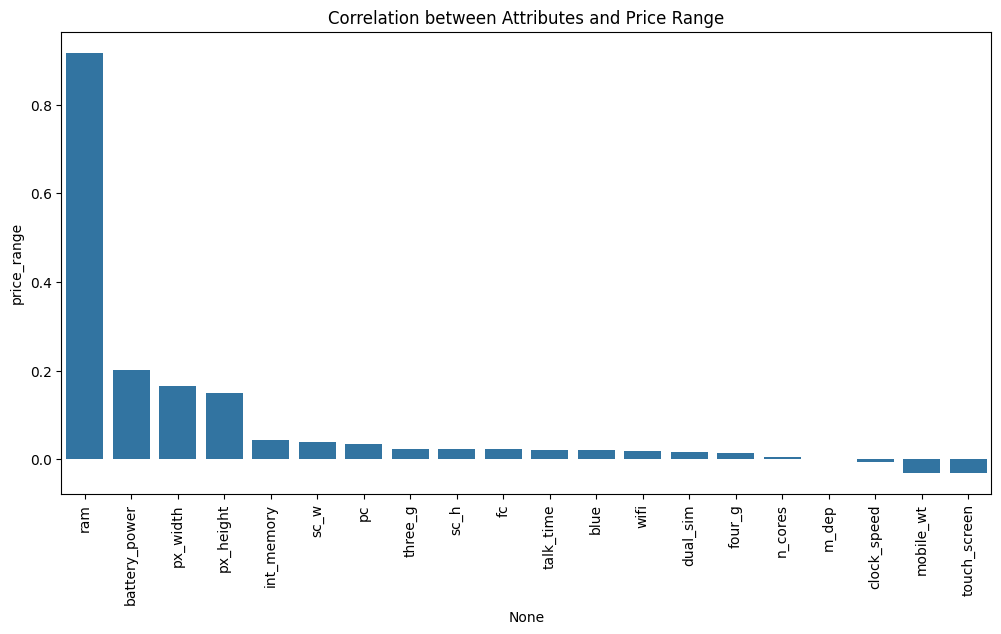

In [19]:
corr=df.corr()
corr=corr.price_range
cr=corr.sort_values(ascending=False)[1:]
plt.figure(figsize=(12,6))
sns.barplot(x=cr.index,y=cr)
plt.title('Correlation between Attributes and Price Range')
plt.xticks(rotation='vertical')

In [20]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [24]:
col=df.iloc[:,:20].columns

In [25]:
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
p=lr.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,p))
lra=accuracy_score(y_test,p)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       151
           1       0.92      0.98      0.95       146
           2       0.98      0.92      0.95       148
           3       0.97      0.98      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [27]:
cm=confusion_matrix(y_test,p)
print(cm)


[[146   5   0   0]
 [  3 143   0   0]
 [  0   8 136   4]
 [  0   0   3 152]]


<Axes: >

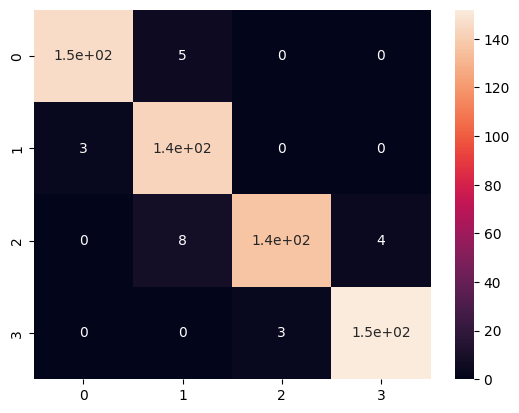

In [28]:
sns.heatmap(cm,annot=True)

### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt=DecisionTreeClassifier()

In [31]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
p=dt.predict(x_test)

In [33]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       151
           1       0.75      0.83      0.79       146
           2       0.76      0.74      0.75       148
           3       0.89      0.85      0.86       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



In [34]:
confusion_matrix(y_test,p)
dta=accuracy_score(y_test,p)

<Axes: >

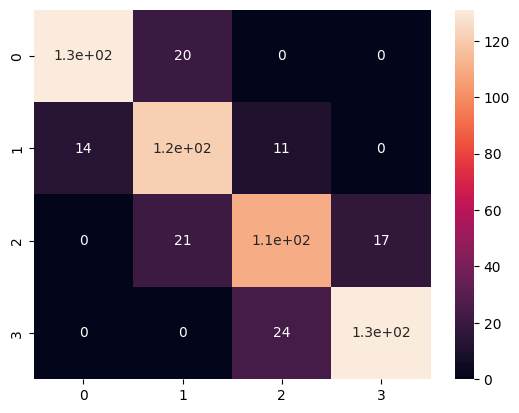

In [35]:
sns.heatmap(confusion_matrix(y_test,p),annot=True)

### Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf=RandomForestClassifier()

In [38]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
pr=rf.predict(x_test)

In [40]:
print(classification_report(y_test,pr))
rfa=accuracy_score(y_test,pr)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.82      0.86      0.84       146
           2       0.78      0.78      0.78       148
           3       0.92      0.88      0.90       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



<Axes: >

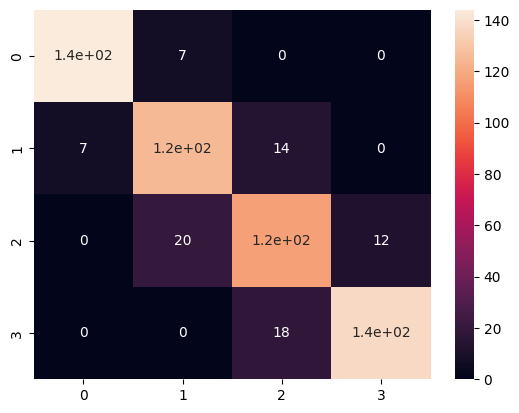

In [41]:
sns.heatmap(confusion_matrix(y_test,pr),annot=True)

### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
kn=KNeighborsClassifier(n_neighbors=700)

In [44]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=700)

In [45]:
p=kn.predict(x_test)

In [46]:
print(classification_report(y_test,p))
knna=accuracy_score(y_test,p)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       151
           1       0.57      0.57      0.57       146
           2       0.54      0.66      0.59       148
           3       0.90      0.61      0.73       155

    accuracy                           0.67       600
   macro avg       0.69      0.67      0.67       600
weighted avg       0.70      0.67      0.67       600



In [52]:
models = ['LR','DTG','RF','KNN']
acc_scores = [lra,dta,rfa,knna]
print("Models\tAccuracy\n")
for i in range(4):
    print(str(models[i]) + "\t" + str(acc_scores[i]),end='\n')

Models	Accuracy

LR	0.9616666666666667
DTG	0.8216666666666667
RF	0.87
KNN	0.67



------------>We decide from the Bar Graph that the best Model is LR<------------


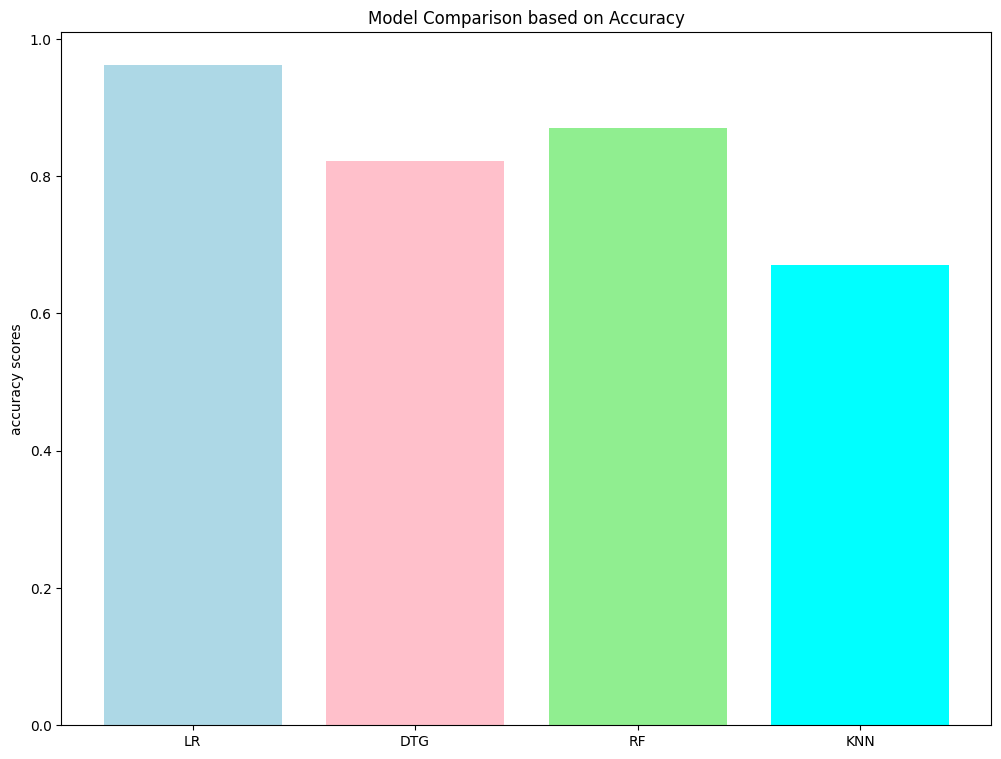

In [53]:
print("\n------------>We decide from the Bar Graph that the best Model is LR<------------")
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgreen', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
plt.show()

In [47]:
tt.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [48]:
tt.drop('id',inplace=True,axis=1)

In [49]:
test=ss.fit_transform(tt)

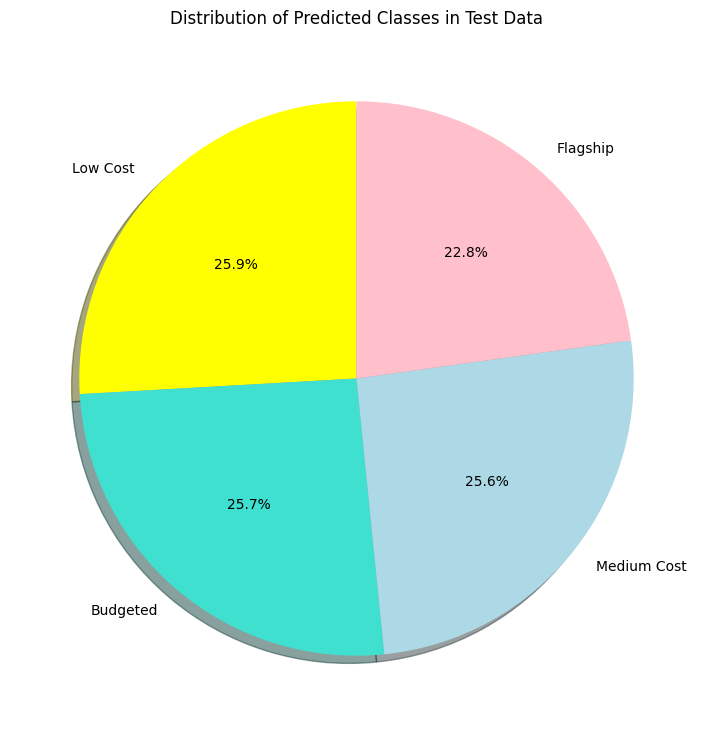

In [50]:

# Prediction
predicted_price_range = lr.predict(test)

tt['price_range'] = predicted_price_range

labels = ["Low Cost", "Budgeted", "Medium Cost", "Flagship"]

values = tt['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
plt.rcParams['figure.figsize'] = (12,9)
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Distribution of Predicted Classes in Test Data')
plt.show()

In [51]:
tt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,2
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
